## Etapa 1: Instando o TensorFlow 2.0

In [0]:
!pip uninstall -y tensorflow #Comando necessário, pois o TensorFlow-gpu não desinstala a versão mais recente do Tensorflow, pode gerar conflitos.

In [1]:
!pip install tensorflow-gpu==2.0

     |████████████████████████████████| 380.8MB 46kB/s 
     |████████████████████████████████| 450kB 39.1MB/s 
     |████████████████████████████████| 3.8MB 56.8MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=60d53c6cf0bf4948c7c2fcedef47c7ee69e0b977195866b4f1e88d9e46a4269d
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorflow-estimator<2.3.0,>=2.2.0, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstal

## Etapa 2: Importando as bibliotecas

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'2.0.0'

## Etapa 3: Pré-processamento

### Carregando a base de dados Cifar10

In [0]:
# Configurando o nome das classes que serão previstas
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
# Carregando a base de dados
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


### Normalização das imagens

In [5]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [0]:
X_train = X_train / 255.0

In [7]:
X_train.shape

(50000, 32, 32, 3)

In [0]:
X_test = X_test / 255.0

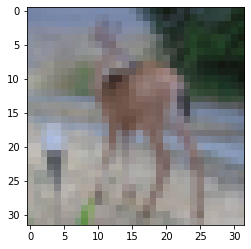

In [11]:
plt.imshow(X_test[100])

In [14]:
X_train[0].shape

(32, 32, 3)

## Etapa 4: Construindo a Rede Neural Convolucional

### Definindo o modelo

In [0]:
model = tf.keras.models.Sequential()

# CNN layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
model.add(tf.keras.layers.Flatten())

# Hidden layer
model.add(tf.keras.layers.Dense(units=256, activation='relu'))
model.add(tf.keras.layers.Dense(units=256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

# Output layer
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)             

### Compilando o modelo

#### sparse_categorical_accuracy

https://stackoverflow.com/questions/44477489/keras-difference-between-categorical-accuracy-and-sparse-categorical-accuracy 

In [0]:
# 0 0 0 1 0 0 0 0 0 0
y_test[0]

In [0]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["sparse_categorical_accuracy"])

### Treinando o modelo

In [60]:
model.fit(X_train, y_train, epochs=100)

Train on 50000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 148us/sample - loss: 0.0542 - sparse_categorical_accuracy: 0.9876
Epoch 2/100
50000/50000 [==============================] - 7s 149us/sample - loss: 0.0538 - sparse_categorical_accuracy: 0.9874
Epoch 3/100
50000/50000 [==============================] - 7s 150us/sample - loss: 0.0602 - sparse_categorical_accuracy: 0.9857
Epoch 4/100
50000/50000 [==============================] - 8s 151us/sample - loss: 0.0616 - sparse_categorical_accuracy: 0.9861
Epoch 5/100
50000/50000 [==============================] - 8s 152us/sample - loss: 0.0601 - sparse_categorical_accuracy: 0.9870
Epoch 6/100
50000/50000 [==============================] - 8s 159us/sample - loss: 0.0689 - sparse_categorical_accuracy: 0.9852
Epoch 7/100
50000/50000 [==============================] - 7s 150us/sample - loss: 0.0500 - sparse_categorical_accuracy: 0.9889
Epoch 8/100
50000/50000 [==============================] - 7s 149us/sample - loss

### Avaliando o modelo

In [58]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [59]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.7202000021934509


In [49]:
test_loss

1.7459642523765564